In [9]:
import time
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict

In [10]:
data=pd.read_csv("train.csv")

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data.shape

(891, 12)

### Dropping unwanted Column

In [16]:
X=data.drop(["Cabin","Ticket","PassengerId","Survived","Name"],axis=1)

In [17]:
Y=data["Survived"]

### Handeling Sex Column(Encoding)

In [18]:
X["Sex"]=X["Sex"].map({"male":1,"female":0})

In [19]:
X["Sex"]=X["Sex"].astype(int)

### Handeling Embarked Column inconsistency

In [20]:
X["Embarked"]=X["Embarked"].map({"S":1,"C":2,"Q":3})

In [21]:
mode=X["Embarked"].mode()[0]

In [22]:
X["Embarked"]=X["Embarked"].fillna(mode)

In [23]:
X["Embarked"]=X["Embarked"].astype("int64")

### Handeling Age inconsistency

In [24]:
mean=X["Age"].mean();

In [25]:
X["Age"]=X["Age"].fillna(mean)

### Checking for any inconsistency in Training set

In [26]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


## Our Traing data does not contains any null or object type value so out data is clean

# EDA

### Survived Vs NotSurvived

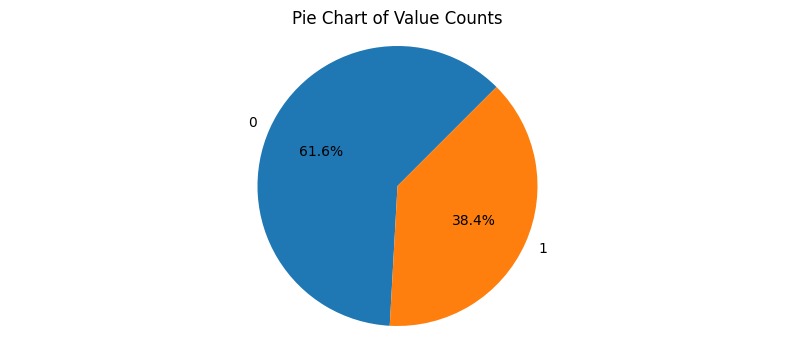

In [28]:
# Step 3: Count the occurrences of each unique value in the column
value_counts = Y.value_counts()
# Step 4: Create the pie chart
plt.figure(figsize=(10, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=45)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart of Value Counts')
plt.show()

In [46]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.361392
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


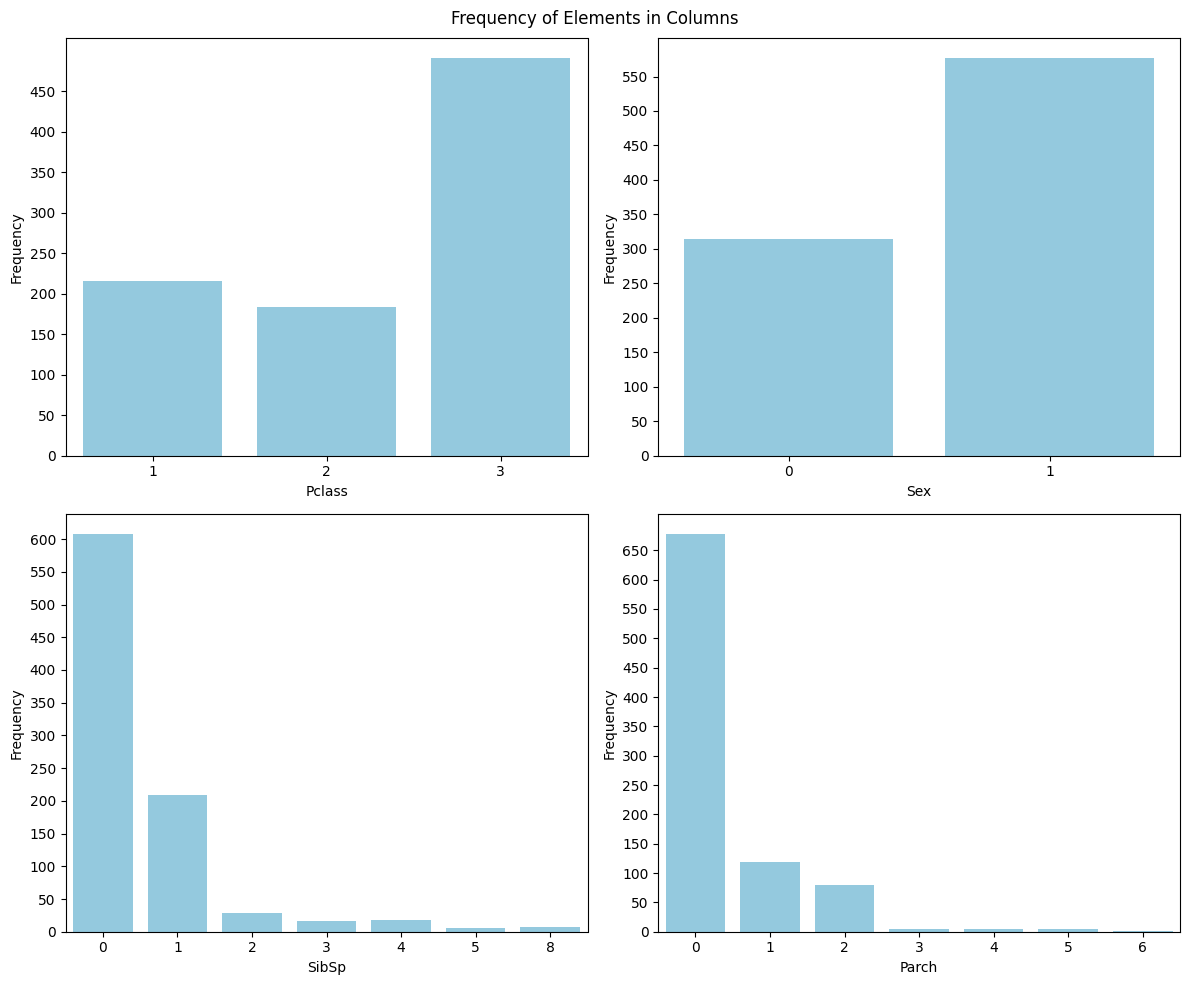

In [32]:

Dict={0:"Pclass",1:"Sex",2:"SibSp",3:"Parch"}
value_counts = {col: X[col].value_counts() for col in Dict.values()}

# Create subplots for each column
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Frequency of Elements in Columns')

# Plot each bar chart
for i, (col, counts) in enumerate(value_counts.items()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.barplot(x=counts.index, y=counts.values, color='skyblue',ax=ax)
    ax.set_ylabel('Frequency')
    ax.set_yticks(range(0, max(counts.values)+1, 50))  # Set ticks every 2 units
    ax.set_yticklabels(range(0, max(counts.values)+1, 50)) 

# Adjust layout
plt.tight_layout()
plt.show()

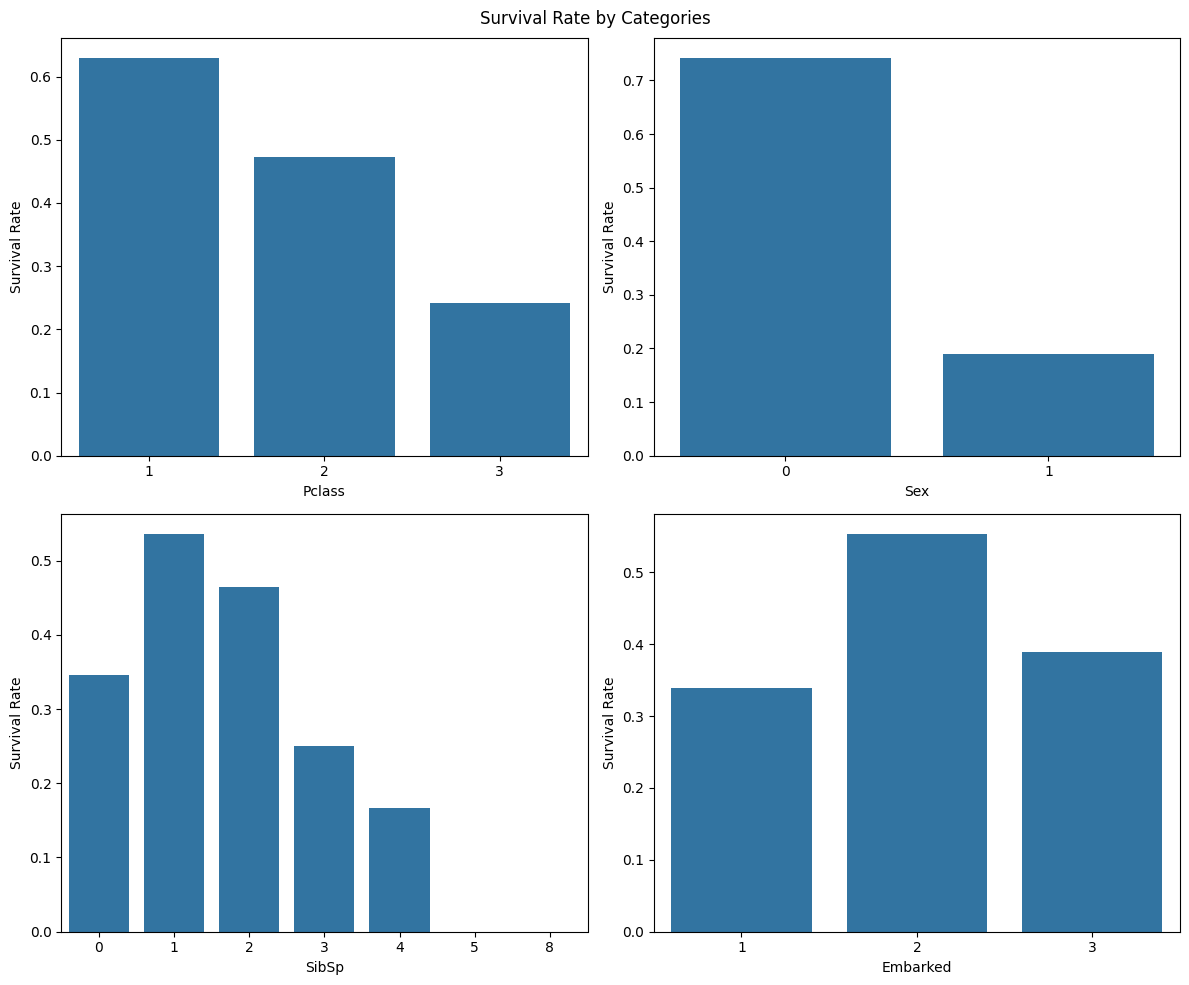

In [33]:
df_merged = pd.concat([X, Y], axis=1)

# Calculate survival rate for each category in each column
survival_rates = {}
for col in ['Pclass','Sex', 'SibSp', 'Embarked']:
    survival_rates[col] = df_merged.groupby(col)['Survived'].mean()

# Plotting

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Survival Rate by Categories')

# Plot bar charts for each category
for i, col in enumerate(['Pclass','Sex', 'SibSp', 'Embarked']):
    row = i // 2
    coli = i % 2
    ax = axes[row, coli]
    
    sns.barplot(x=survival_rates[col].index, y=survival_rates[col].values, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Survival Rate')
#     ax.set_title(f'Survival Rate by {coli}')

# Adjust layout
plt.tight_layout()
plt.show()

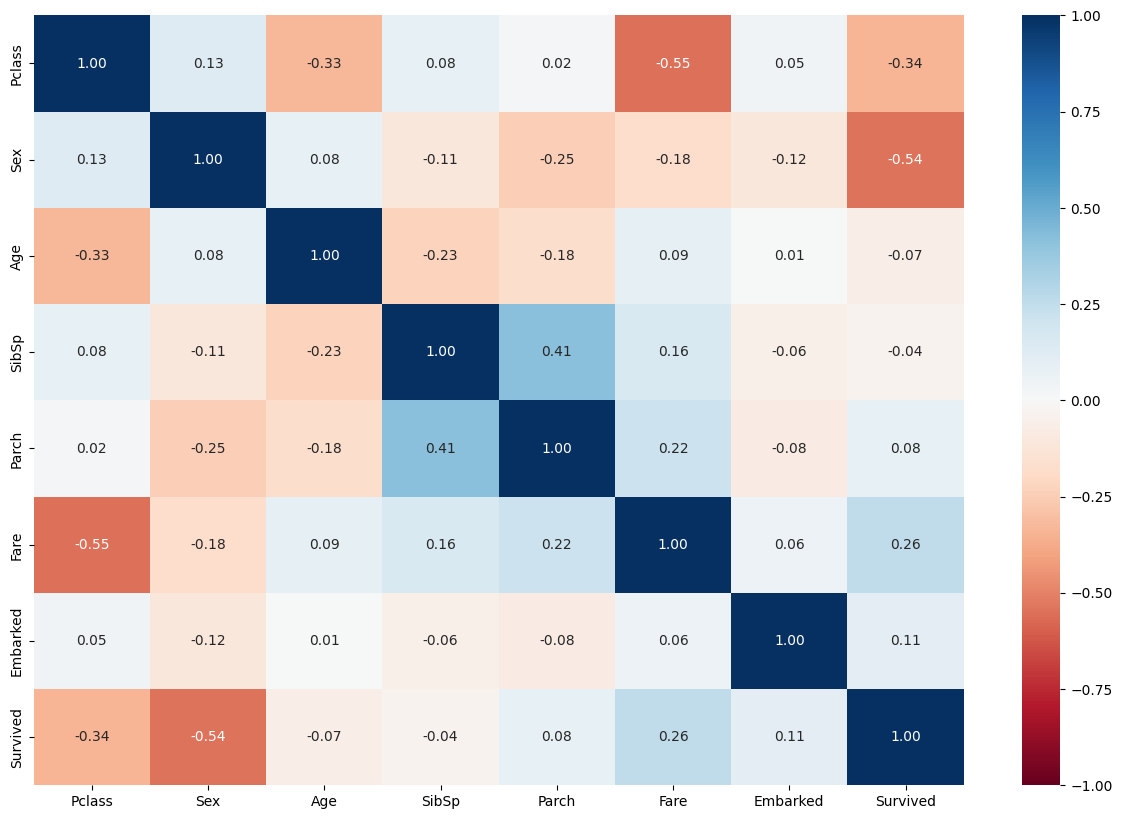

In [34]:
plt.figure(figsize=[15,10])
sns.heatmap(pd.concat([X,Y],axis=1).corr(),cmap="RdBu",fmt="0.2f",vmin=-1,vmax=1,annot=True)
plt.show()

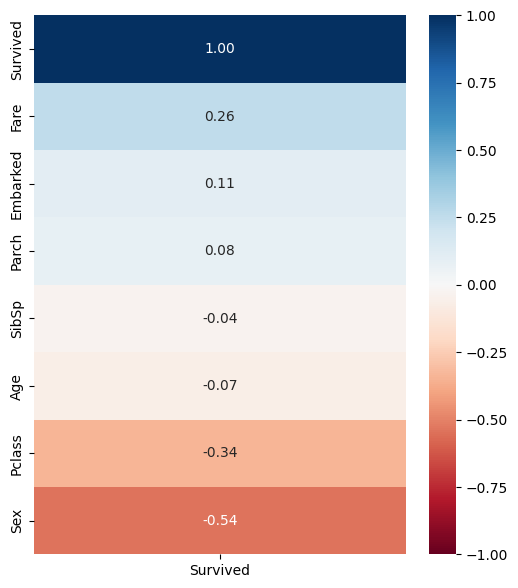

In [35]:
plt.figure(figsize=[6,7])
sns.heatmap(pd.concat([X,Y],axis=1).corr()[["Survived"]].sort_values(by="Survived",ascending=False),
            cmap="RdBu",annot=True,fmt="0.2f",vmax=1,vmin=-1)
plt.show()

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

In [37]:
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (712, 7)
x_test shape:  (179, 7)
y_train shape:  (712,)
y_test shape:  (179,)


In [38]:
model=RandomForestClassifier()

In [39]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
prediction=model.predict(x_test)

In [41]:
classi=classification_report(y_test,prediction)

In [42]:
print(classi)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       106
           1       0.81      0.63      0.71        73

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [43]:
pip show scikit-learn

Name: scikit-learn
Version: 1.4.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Python311\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: dython, feature-engine
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sclearn.ensemble import RandomForestClassifier 

In [44]:
import joblib

In [45]:
joblib.dump(model,'D:/projects/titanic/titanic_model.pkl')

['D:/projects/titanic/titanic_model.pkl']

In [47]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
862,1,0,48.000000,0,0,25.9292,1
223,3,1,29.699118,0,0,7.8958,1
84,2,0,17.000000,0,0,10.5000,1
680,3,0,29.699118,0,0,8.1375,3
535,2,0,7.000000,0,2,26.2500,1


In [50]:
y_test[680]

0